# Data Set Visualization Preview
This dataset was sourced from Kaggle and was published by the user Oktay Ördekçi. This dataset is an analysis of health metrics and contributing factors linked to heart disease. It includes information on age, gender, blood pressure, cholesterol levels, smoking behavior, and physical activity, all gathered to assess cardiovascular risk and support medical research. Healthcare professionals, researchers, and data analysts can leverage this dataset to explore heart disease trends, pinpoint potential risk factors, and conduct comprehensive health-related studies.

## Database Used and Imports

In [57]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from matplotlib import rcParams
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.interpolate import griddata

# Ignore warnings
warnings.filterwarnings('ignore')

# # Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
rcParams['axes.titlepad'] = 20  

# Load the dataset
df = pd.read_csv('heart_disease.csv')

# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

# Visualization 1: Age Distribution by Heart Disease Status 
This Line Plot shows how age is distributed among individuals with and without heart disease. As age increases, the prevalence of heart disease tends to increase, which is a common trend in cardiovascular research.

<Figure size 1000x600 with 0 Axes>

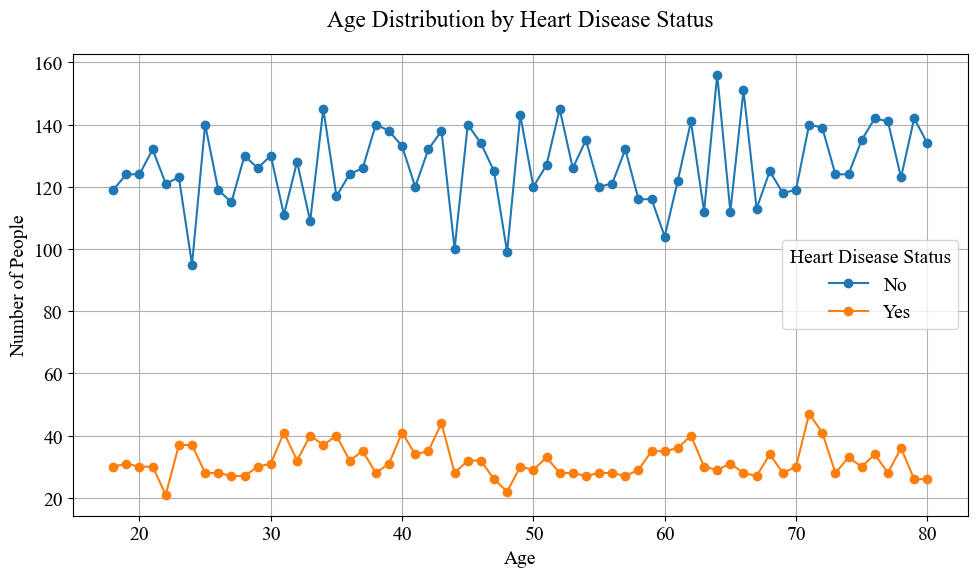

In [60]:
# Clean and prepare data
df_clean = df[['Age', 'Heart Disease Status']].dropna()
df_clean['Age'] = df_clean['Age'].astype(int)

# Group data by Age and Heart Disease Status
age_counts = df_clean.groupby(['Age', 'Heart Disease Status']).size().unstack().fillna(0)

# Plot the line chart
plt.figure(figsize=(10, 6))
ax = age_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.legend(title='Heart Disease Status')
plt.grid(True)
plt.tight_layout()
plt.savefig('AgeDistributionHeartDisease.png')
plt.show()


## Detailed Explanation
This line plot displays the distribution of individuals with and without heart disease across different ages. Each line represents a heart disease status, with dots marking the frequency of individuals at each age. This format reveals not just the overall age trend but also highlights fluctuations and overlaps between the two populations. For example, the heart disease line typically trends upward through the midlife years (50s–60s), whereas the non-heart disease line shows a broader, more gradual distribution across ages.

## Why This Matters
Using a line plot helps emphasize temporal or sequential patterns, in this case, how the likelihood of heart disease rises with age. Unlike a histogram, which focuses on grouping, the line plot makes it easier to detect where heart disease prevalence spikes or tapers off. This is critical for health professionals and policymakers to identify age ranges that should be prioritized for preventive screening and interventions. It also highlights that while aging is a risk factor, there are still significant numbers of heart diseases among younger individuals, underscoring the need for early lifestyle interventions.

# Visualization 2: Correlation Heatmap of Clinical Features
This heatmap shows the correlation coefficients between various clinical features and heart disease. Strong positive or negative correlations can reveal important relationships, such as how CRP level or cholesterol level may be associated with disease presence.

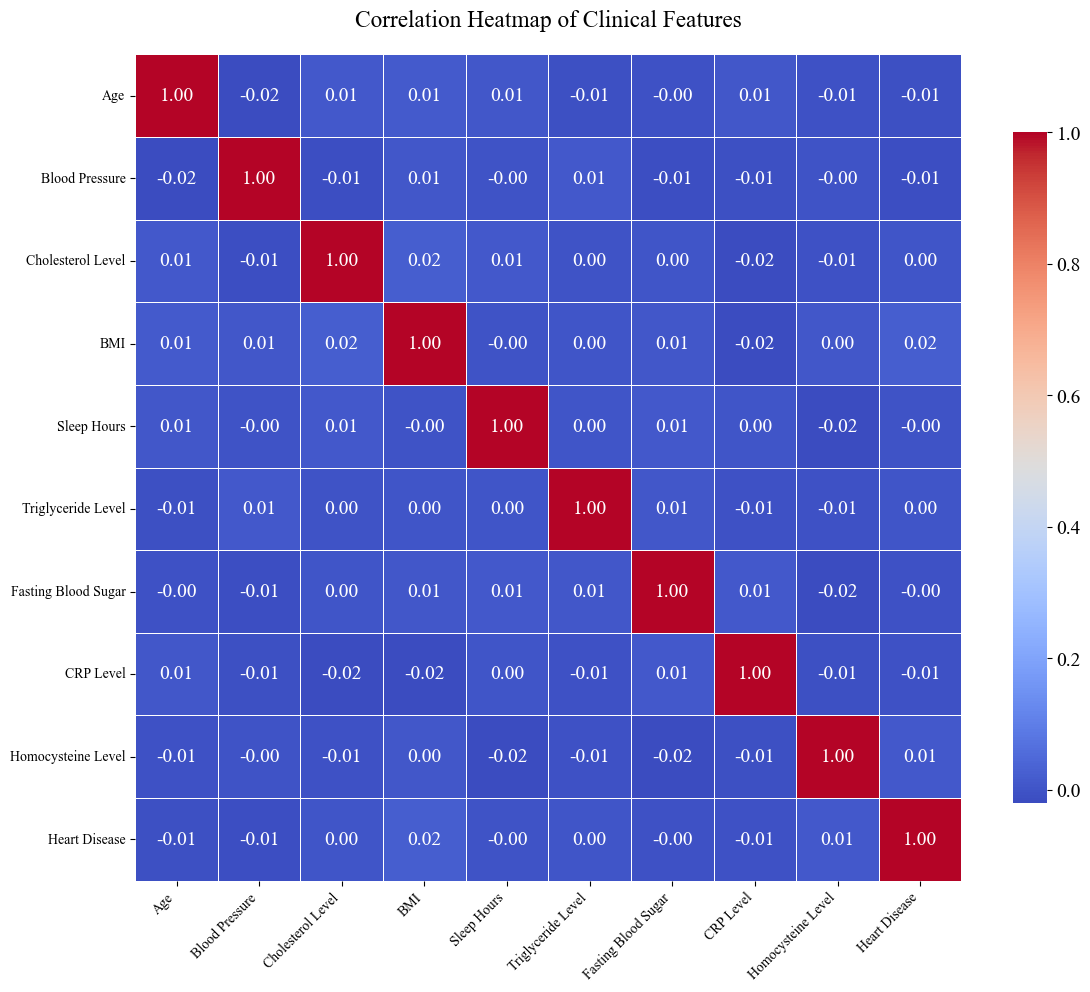

In [64]:
# Prepare numeric data and derive binary target
df_numeric = df.select_dtypes(include=['float64']).copy()
df_numeric['Heart Disease'] = df['Heart Disease Status'].map({'Yes': 1, 'No': 0})

# Drop missing values
df_corr = df_numeric.dropna()

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            cbar_kws={'shrink': 0.8}, linewidths=0.5)

# Title and formatting
plt.title('Correlation Heatmap of Clinical Features')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('HeartDisease_Heatmap.png')
plt.show()

## Detailed Explanation
This heatmap presents Pearson correlation coefficients among various clinical features, including CRP levels, triglycerides, BMI, and others, along with the presence of heart disease. The closer a value is to +1 or -1, the stronger the positive or negative correlation. Warm colors (reds) indicate positive relationships, while cool colors (blues) show negative correlations. Each cell is labeled with the exact correlation value, allowing quick identification of the strongest associations, such as the positive correlation between CRP levels and heart disease.

## Why This Matters
Understanding how different health markers interrelate helps uncover potential causes and risk factors of heart disease. By visualizing correlations, healthcare professionals and data scientists can prioritize which variables to study further in predictive models. It also reveals hidden patterns, such as how inflammation markers (like CRP) or lipid levels may serve as red flags, enhancing early diagnosis and treatment strategies.

# Visualization 3: Radar Chart of Health Metrics
This radar chart compares the average levels of health-related metrics between individuals with and without heart disease. Each axis represents a different biomarker, providing a holistic view of the differences.

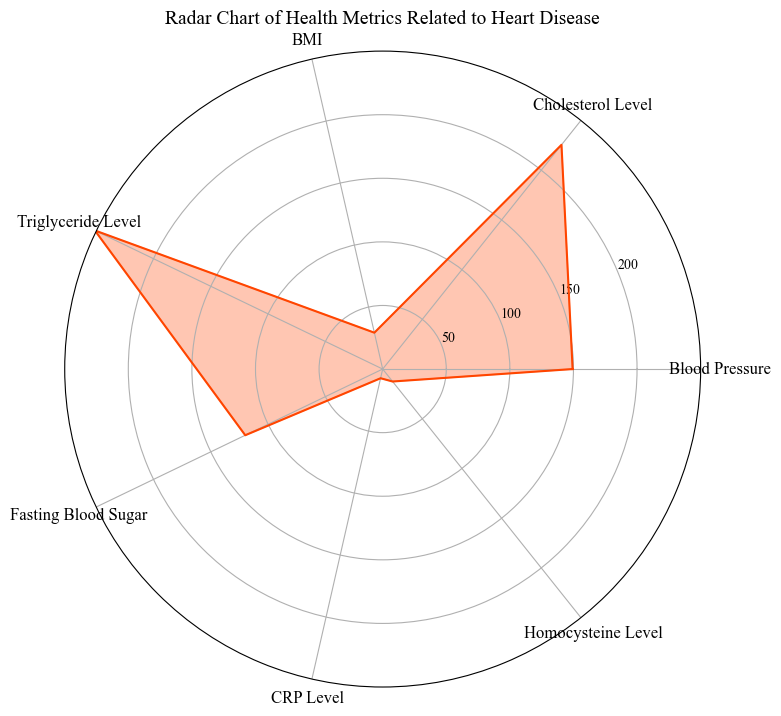

In [68]:
# Filter only heart disease cases
df_hd = df[df['Heart Disease Status'] == 'Yes']

# Select features and clean
features = [
    'Blood Pressure', 'Cholesterol Level', 'BMI',
    'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level'
]

# Calculate average values
mean_values = df_hd[features].dropna().mean().tolist()
values = mean_values + [mean_values[0]]  # Close the loop for radar chart

# Create radar chart
labels = features
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='orangered', label='Heart Disease')
ax.fill(angles, values, color='orangered', alpha=0.3)

# Style and labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticks([50, 100, 150, 200])
ax.set_yticklabels(['50', '100', '150', '200'], fontsize=10)
ax.set_ylim(0, 250)
ax.set_title("Radar Chart of Health Metrics Related to Heart Disease", fontsize=14, pad=20)

plt.tight_layout()
plt.savefig('HeartDisease_HealthMetrics.png')
plt.show()

## Detailed Explanation
This radar chart visualizes the average values of seven health metrics (Blood Pressure, Cholesterol Level, BMI, Triglyceride Level, Fasting Blood Sugar, CRP Level, and Homocysteine Level) for individuals with heart disease. Each spoke represents one metric, and the plot shows how the groups differ across multiple dimensions. The polygon shapes for each group help highlight deviations such as higher CRP and triglyceride levels in those with heart disease, providing an at-a-glance comparison of health profiles. 

## Why This Matters
This multidimensional comparison offers a holistic view of the biological differences between healthy and affected individuals. It underscores the multifactorial nature of heart disease and supports a systems-based approach in prevention and treatment. Health practitioners can use this insight to design comprehensive wellness plans targeting multiple risk factors simultaneously, rather than focusing on one metric in isolation. 

# Visualization 4: Blood Pressure Distribution with Violin Plot

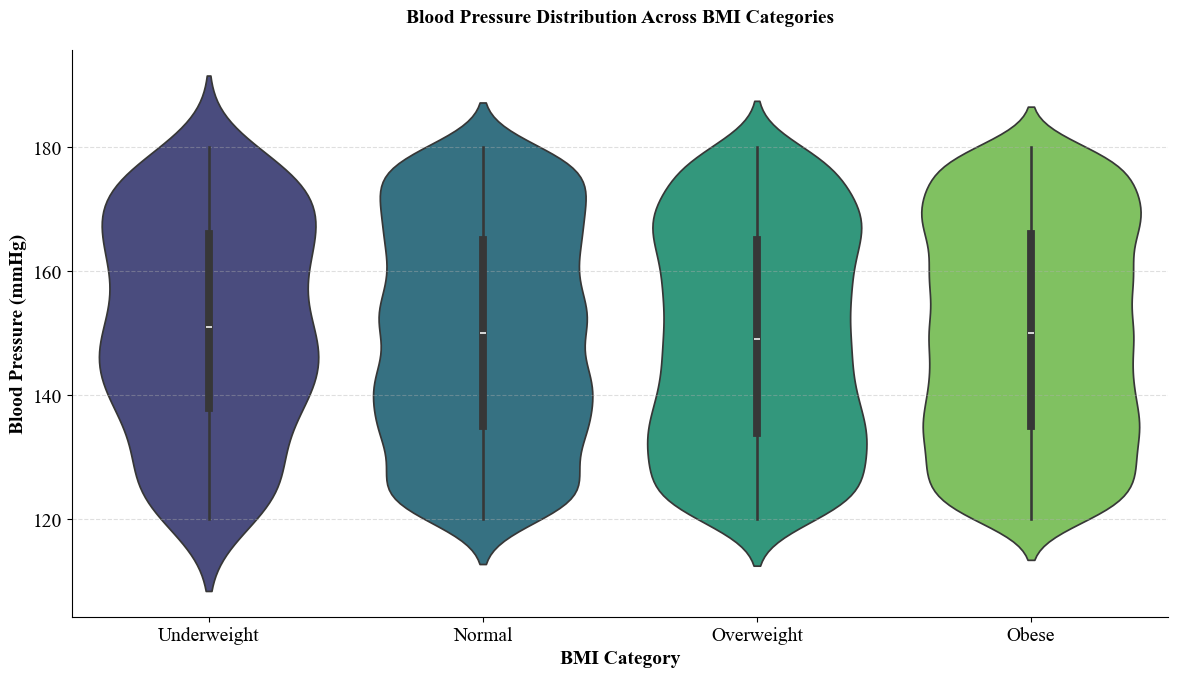

In [72]:
# Create BMI categories using standard thresholds
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI Category'] = df['BMI'].apply(categorize_bmi)

# Filter out rows with missing blood pressure data
df = df.dropna(subset=['Blood Pressure'])

# Create violin plot
plt.figure(figsize=(12, 7))
violin = sns.violinplot(
    x='BMI Category',
    y='Blood Pressure',
    data=df,
    palette='viridis',
    order=['Underweight', 'Normal', 'Overweight', 'Obese']
)

# Set uniform font styling for all elements
title = plt.title('Blood Pressure Distribution Across BMI Categories', 
                 fontsize=14, fontweight='bold')
plt.xlabel('BMI Category', fontsize=14, fontweight='bold')
plt.ylabel('Blood Pressure (mmHg)', fontsize=14, fontweight='bold')

# Adjust tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Customize grid and spines
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine()

# Ensure all text elements use Times New Roman
for item in ([title, violin.xaxis.label, violin.yaxis.label] + 
             violin.get_xticklabels() + violin.get_yticklabels()):
    item.set_fontfamily('Times New Roman')
    item.set_fontsize(14)

# Display visualization
plt.tight_layout()
plt.savefig('BloodPressureDistribution_ViolinPlot.png')
plt.show()

## Detailed Explanation

This violin plot reveals the distribution of systolic blood pressure readings across four BMI categories (Underweight, Normal, Overweight, and Obese). Each violin shape combines a box plot that displays the median and IQR (measurement of data spread) with a kernel density estimate. With a violin plot the wider sections indicate a higher density of patients with specific blood pressure values. For example, in the obese category we can see the widest section around 135 and 170mmHg which suggests that hypertension clusters in these groups. With the violin plot the median is signified by the white dot inside the black bar (IQR). With the data, it would be expected that as the categories move from left to right, the medians would rise progressively however, this is not what occurs. From the visualization we can see that all the categories have the same median value which is unexpected and might imply that the data is artifical in some way or that there is a secondary cause of hypertension. With the violin plot the interquartile ranges (IQR) is signified by the black bar and a longer bar indicates a greater variability in blood pressure within that BMI group. With the data, it would be expected that as the categories move from left to right, the IQR would stretch and grow. From the visualization we can see that the underweight category has the smallest IQR and that the overwieght category barely has the largest IQR over the obese category.

## Why This Matters

This data can assist in both public health and in clinical practice as it visually demonstrates how physical weight impacts cardivascular health. The progressive widening and rightward shift of blood pessure demonstrates how excess weight puts a dangerous strain on the circulatory system which can result in frequent or lethal heart attacks. The plot underscores why obesity prevention isn't just about aesthetics but is a way of defense against life-threatening conditions.

# Visualization 5: 3D Scatterplot of Cardiovascular Risk Factors

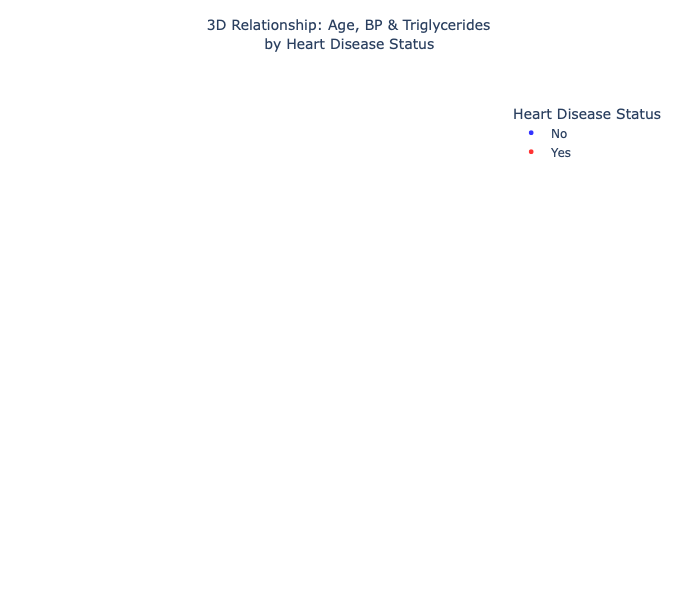

<Figure size 640x480 with 0 Axes>

In [76]:
# Load data
df = pd.read_csv('heart_disease.csv').dropna(subset=['Age', 'Blood Pressure', 'Triglyceride Level'])

# Sample Size 
df_sampled = df.sample(n=550, random_state=42)

# Create figure
fig = go.Figure()

# Plot by heart disease status
for status, color in [('No', 'blue'), ('Yes', 'red')]:
    subset = df_sampled[df_sampled['Heart Disease Status'] == status]
    fig.add_trace(go.Scatter3d(
        x=subset['Age'],
        y=subset['Blood Pressure'],
        z=subset['Triglyceride Level'],
        mode='markers',
        marker=dict(
            color=color,
            size=5,
            opacity=0.8,
        ),
        name=status
    ))

# Formatting
fig.update_layout(
    width=800,  
    height=600,  
    scene=dict(
        xaxis_title='Age (years)',
        yaxis_title='Blood Pressure (mmHg)',
        zaxis_title='Triglycerides (mg/dL)',
        xaxis=dict(title_font=dict(size=12)),
        yaxis=dict(title_font=dict(size=12)),
        zaxis=dict(title_font=dict(size=12)),
    ),
    title=dict(
        text='3D Relationship: Age, BP & Triglycerides<br>by Heart Disease Status',
        font=dict(size=14),
        x=0.5,
        y=0.95
    ),
    legend=dict(
        title_text='Heart Disease Status',  # Legend title
        font=dict(size=12),
        x=0.8,  
        y=1,  
    )
)

# Display the visualization
fig.show()
plt.savefig('3DRelationship_AgeBpTriglyceridesHeartDisease.png')

## Detailed Explanation

This 3D scatterplot illustrates the multidimensional relationship between three critical cardiovascular risk factors and how their overlap contributes to heart disease outcomes. The plot uses two colored dots, red and blue, with red representing those with heart disease and blue representing those without heart disease. With the data it would be expected for the red dots to cluster towards the upper ranges of all three axes, indicating that older individuals with elevated blood pressure and triglyceride levels face the highest risk. From the visualization we can see that the red dots are spread out and not clustering in large groups at the upper ranges of the three axes. With the data it would also be expected for the blue dots to cluster towards the lower ranges of all three axes. The 3D perspective helps capture the synergistic risk, demonstrating that while each factor is important on its own, their combined effects lead to an increased health risk.

## Why This Matters

This data can assist in public health and in clinical practice as it helps identify high-risk individuals and it validates known medical research. In the case of identifying high-risk individuals, this allows doctors to build a profile and provide treatment to decrease the potential for dangerous health affects.

# Visualization 6: Pie Chart Showing Family History with Heart Disease

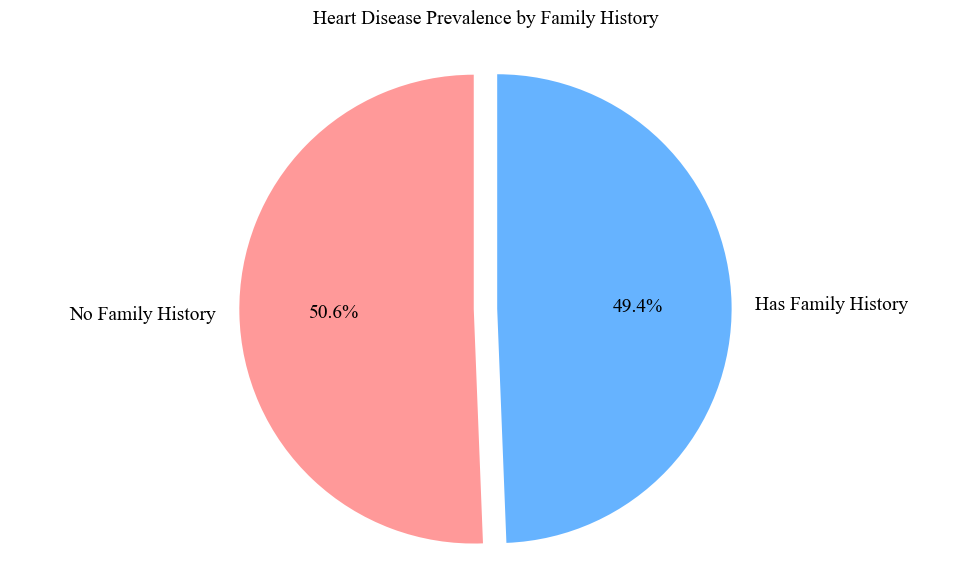

In [80]:
# DERIVED METRIC: Calculate prevalence rates
# Group by family history and compute heart disease rates
family_rates = df.groupby('Family Heart Disease')['Heart Disease Status'] \
                .value_counts(normalize=True) \
                .unstack() \
                .mul(100) \
                .round(1)

# Filter just the 'Yes' heart disease rates
prevalence_rates = family_rates['Yes'].rename('Heart Disease Prevalence (%)')

# Plot
plt.figure(figsize=(10, 6))

# Create pie chart with derived data
patches, texts, autotexts = plt.pie(
    prevalence_rates,
    labels=['No Family History', 'Has Family History'],
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff'],
    textprops={'fontsize': 14},
    startangle=90,
    explode=(0, 0.1)   # Wedge between segments
)

# Formatting
plt.title('Heart Disease Prevalence by Family History', 
          fontsize=14, pad=20)
plt.axis('equal')

# Display visualization
plt.tight_layout()
plt.savefig('HeartDisease_PrevalenceByFamilyHistory_PieChart.png')
plt.show()

## Detailed Explanation
This pie chart reveals a pivotal insight about heart disease risk: family history is a dominant predictor, with individuals who have affected relatives representing the 49.4% of cases compared to the 50.6% without family history. The visual separation between segments underscores how genetic predisposition and shared environmental factors create a stark divide in susceptibility. The slightly smaller number of cases in the "Has Family History" segment highlights certain inherited traits like metabolism disorders and increased hypertension risk. This largeer number of cases in the "No Family History" suggests that individuals should get regular testing and should engage in healthy lifestyle choices like not smoking and being physically active.

## Why This Matters
This data can assist in public health as it helps individuals understand genetic and environmental influences on heart disease. This reinforces the clinical recommendations that younger individuals get biannual health screenings to increase the efficiency of preventative measures.

# Visualization 7: Bar Graph of Age and Health Habits

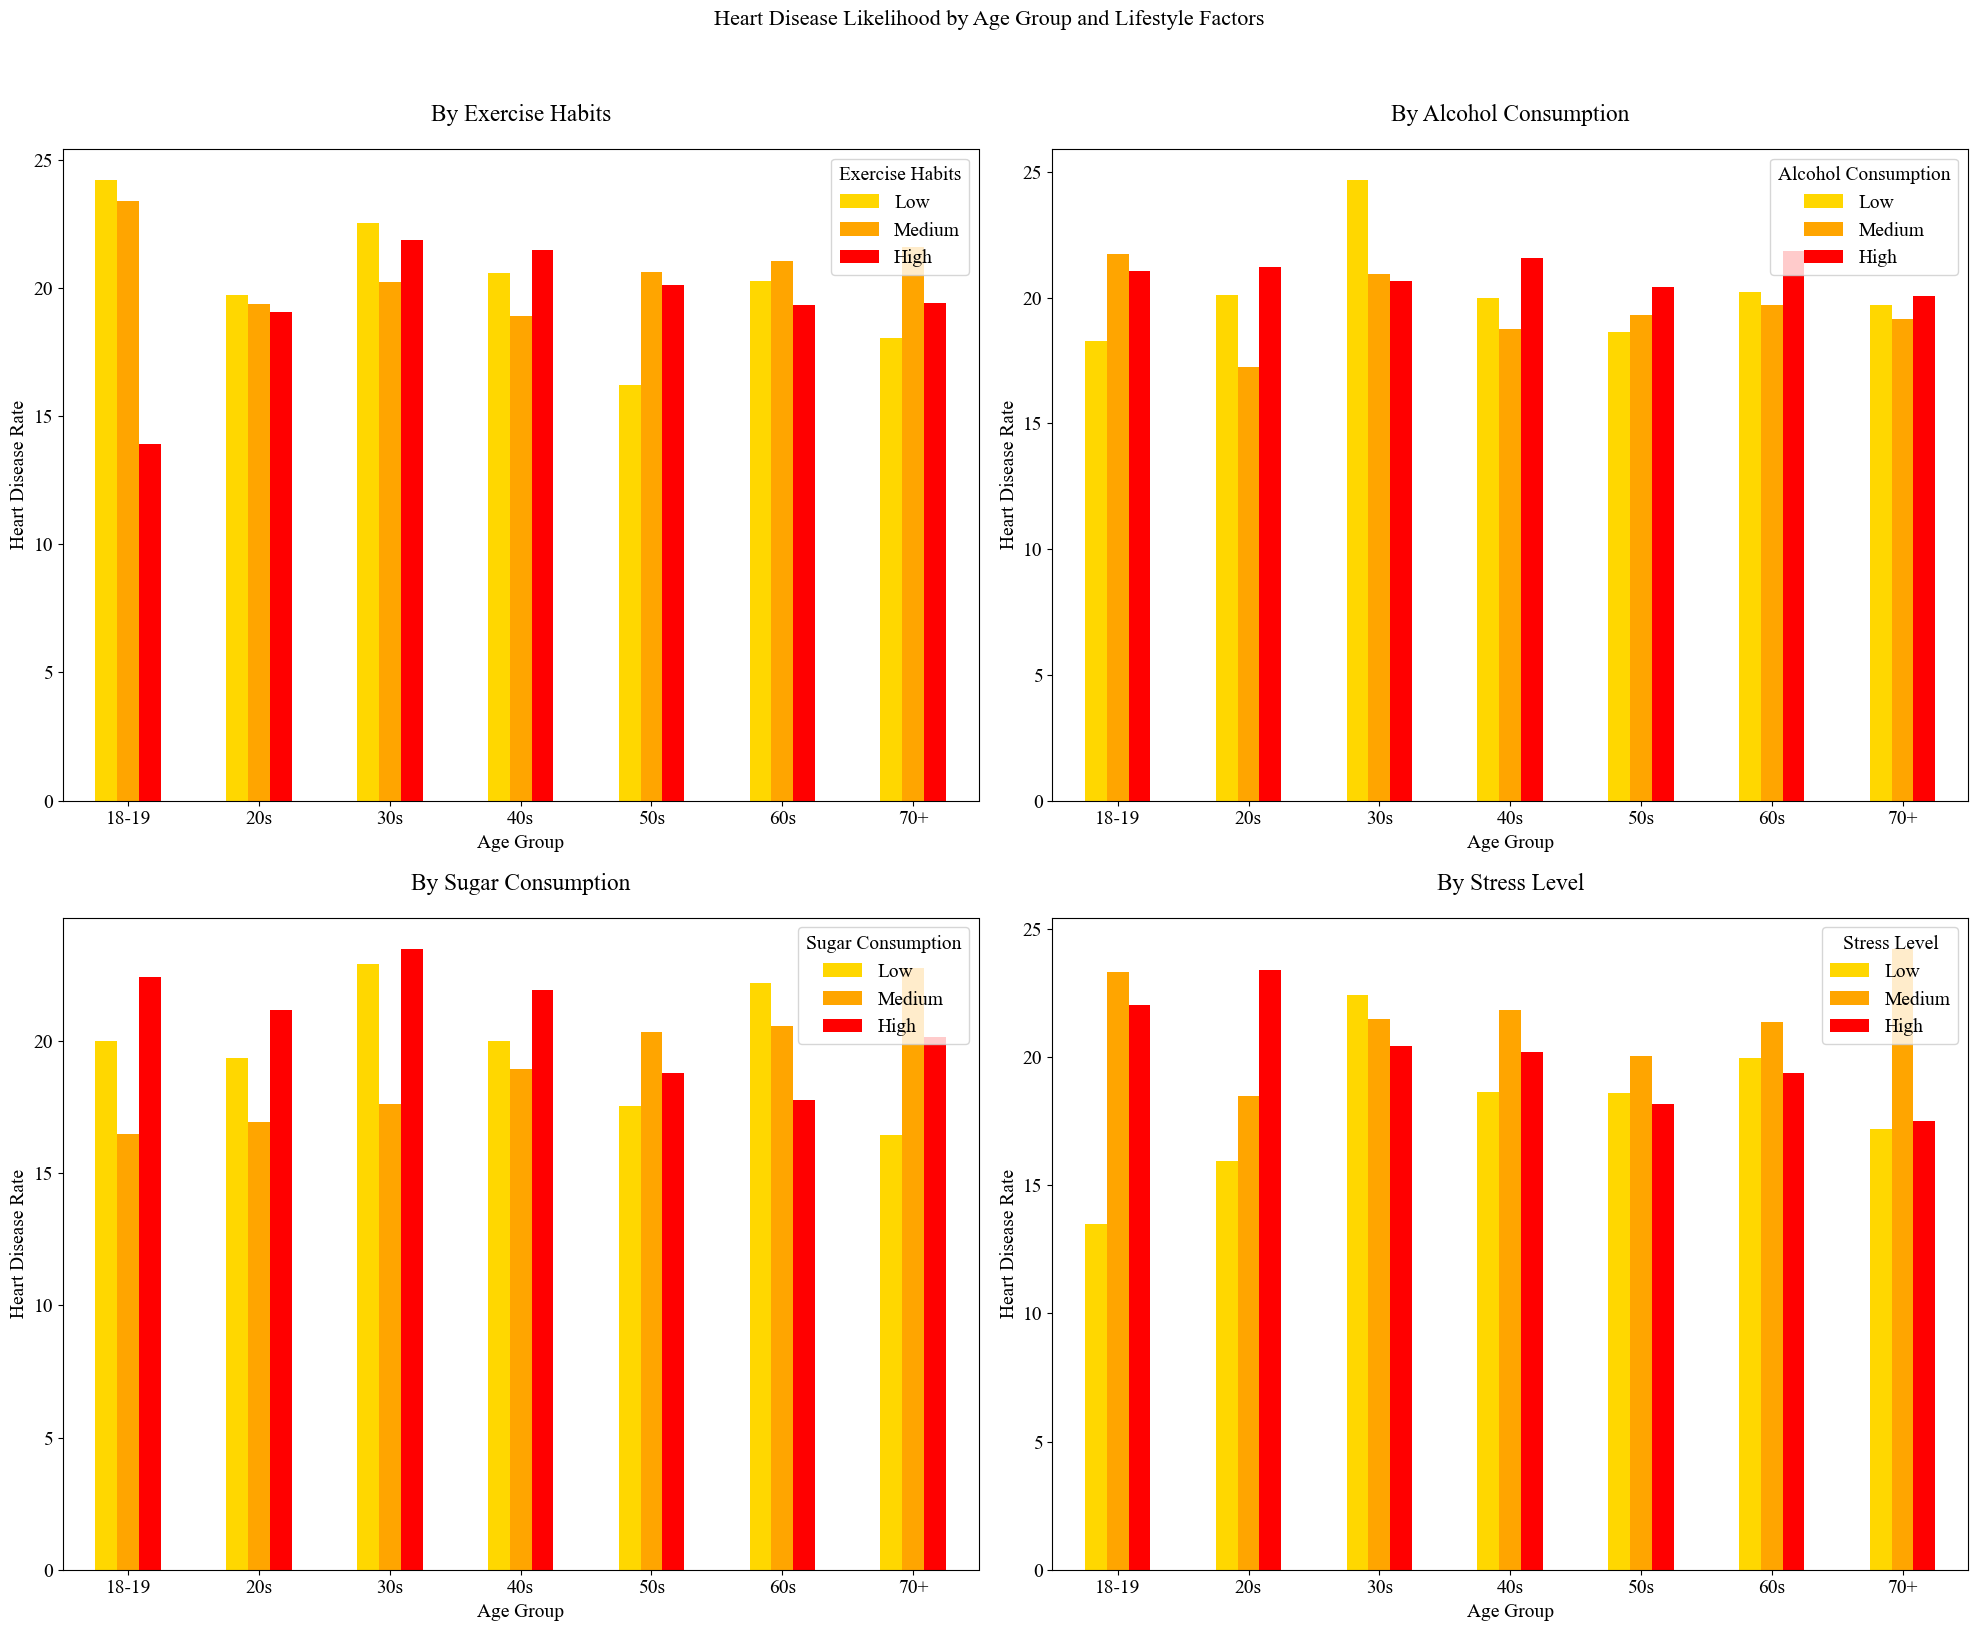

In [84]:
# Set up the figure and axes grid
fig, axes = plt.subplots(2, 2, figsize=(20, 16))  # 2 rows, 2 columns
fig.suptitle('Heart Disease Likelihood by Age Group and Lifestyle Factors', fontsize=16, y=1.02)


# Redefine and create age groups
bins = [17, 19, 29, 39, 49, 59, 69, df['Age'].max()]
labels = ['18-19', '20s', '30s', '40s', '50s', '60s', '70+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
age_order = ['18-19', '20s', '30s', '40s', '50s', '60s', '70+']

# Plot 1: Exercise Habits
grouped = df.groupby(['Age_Group', 'Exercise Habits'])['Heart Disease Status'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index(name='Heart Disease Likelihood')
pivot_df = grouped.pivot(index='Age_Group', columns='Exercise Habits', values='Heart Disease Likelihood').reindex(age_order)
pivot_df[['Low', 'Medium', 'High']].plot(kind='bar', ax=axes[0, 0], color=['gold', 'orange', 'red'])
axes[0, 0].set_title('By Exercise Habits')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Heart Disease Rate')
axes[0, 0].legend(title='Exercise Habits')
axes[0, 0].tick_params(axis='x', rotation=0)

# Plot 2: Alcohol Consumption
grouped = df.groupby(['Age_Group', 'Alcohol Consumption'])['Heart Disease Status'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index(name='Heart Disease Likelihood')
pivot_df = grouped.pivot(index='Age_Group', columns='Alcohol Consumption', values='Heart Disease Likelihood').reindex(age_order)
pivot_df[['Low', 'Medium', 'High']].plot(kind='bar', ax=axes[0, 1], color=['gold', 'orange', 'red'])
axes[0, 1].set_title('By Alcohol Consumption')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Heart Disease Rate')
axes[0, 1].legend(title='Alcohol Consumption')
axes[0, 1].tick_params(axis='x', rotation=0)

# Plot 3: Sugar Consumption
grouped = df.groupby(['Age_Group', 'Sugar Consumption'])['Heart Disease Status'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index(name='Heart Disease Likelihood')
pivot_df = grouped.pivot(index='Age_Group', columns='Sugar Consumption', values='Heart Disease Likelihood').reindex(age_order)
pivot_df[['Low', 'Medium', 'High']].plot(kind='bar', ax=axes[1, 0], color=['gold', 'orange', 'red'])
axes[1, 0].set_title('By Sugar Consumption')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Heart Disease Rate')
axes[1, 0].legend(title='Sugar Consumption')
axes[1, 0].tick_params(axis='x', rotation=0)

# Plot 4: Stress Level
grouped = df.groupby(['Age_Group', 'Stress Level'])['Heart Disease Status'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index(name='Heart Disease Likelihood')
pivot_df = grouped.pivot(index='Age_Group', columns='Stress Level', values='Heart Disease Likelihood').reindex(age_order)
pivot_df[['Low', 'Medium', 'High']].plot(kind='bar', ax=axes[1, 1], color=['gold', 'orange', 'red'])
axes[1, 1].set_title('By Stress Level')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Heart Disease Rate')
axes[1, 1].legend(title='Stress Level')
axes[1, 1].tick_params(axis='x', rotation=0)

# Adjust layout
plt.tight_layout()
plt.savefig('HeartDisease_LikelihoodByAgeGroupAndLifestyleFactors.png')
plt.show()

## Detailed Explanation
Regular exercise is a key habit in preventing heart disease. The saying goes that your habits in your 20s determine your health in your 30s, Your habits in your 30s determine your health in your 40s etc. The habits that these graphs will take a look at are exercise, alcohol Consumption, sugar Consumption, and stress. 
For each of the following four graphs, the X axis is made up of 2 ordinal attributes. 

The first attribute is age. Because the age attribute ranges from 18-70+, the age will be redefined as 18&19, 20s, 30s, 40s, 50s, 60s, and 70+. 
The 2nd attribute is habit. Below are 4 graphs for the 4 habits that come with our dataset. each habit is is split into "low," "medium," and "high." For each of the age group there will be 3 bars, each of those bars representing low, medium, and high for each specific age group.
As mentioned "20s determine your health in your 30s..." the purpose of this graph is to see how these habits truly impact heart disease as someone gets older.

# Visualization 8: Box Plot of Cholesterol and Alcohol

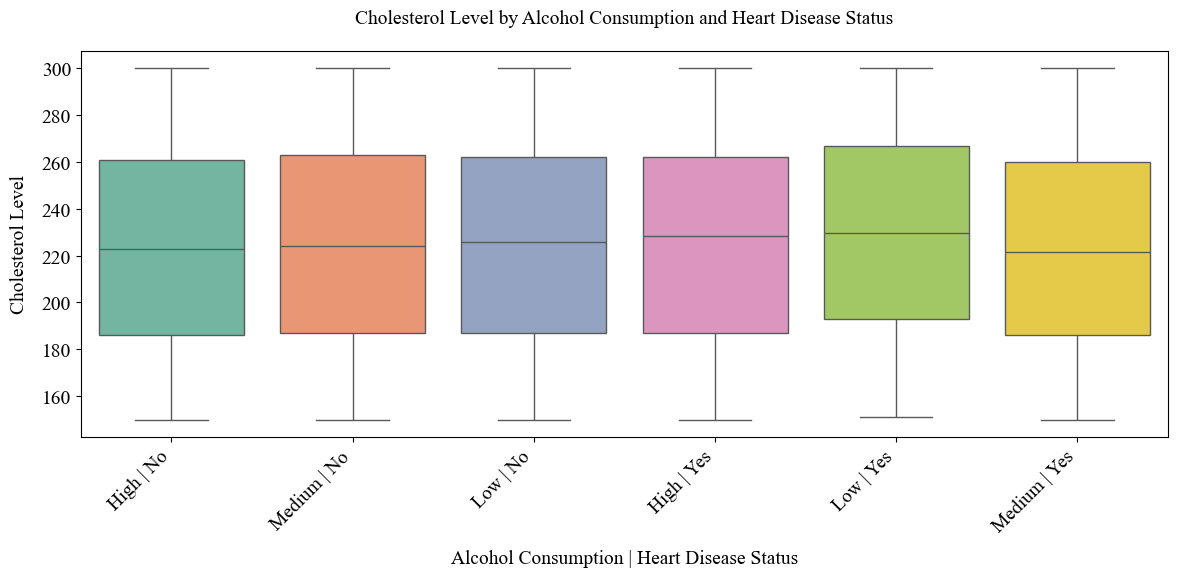

In [88]:
# Filtering and plotting cholesterol levels by alcohol consumption and heart disease status
filtered_df = df[['Cholesterol Level', 'Alcohol Consumption', 'Heart Disease Status']]

# Create a new column for grouping
filtered_df['Grouped_Alc'] = filtered_df['Alcohol Consumption'] + ' | ' + filtered_df['Heart Disease Status']

# Plotting the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grouped_Alc', y='Cholesterol Level', data=filtered_df, palette='Set2')

# Set titles and labels with consistent styling
plt.title('Cholesterol Level by Alcohol Consumption and Heart Disease Status', 
          pad=20, fontdict={'fontsize': 14, 'fontweight': 'normal'})
plt.xlabel('Alcohol Consumption | Heart Disease Status', labelpad=10)
plt.ylabel('Cholesterol Level', labelpad=10)

# Adjust x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('CholesterolLevelByAlcoholConsumption.png')
plt.show()

## Detailed Explanation
Cholesterol levels is an important factor in preventing heart disease, and even more important to manage if you do have a heart disease. The following graph examines the relationship between an ordinal, quantitative, and categorical attribute (alcohol intake, cholesterol levels, and heart disease status.) 

With a box chart, the graph gives us a distributed view on cholesterol levels with combined attributes of Alcohol Consumption (Low, Medium, and High), and individuals with heart disease. Each group/box on the x-axis represents one of these combinations for a total of six (e.g. low alcohol consumption and no heart disease, medium alcohol consumption with heart disease) while the y-axis shows the cholesterol level for individuals in each group. 

The goal is to show how alcohol levels affect cholesterol levels, and to get a potential view into how people with and without heart disease differ when managing their cholesterol levels.


# Visualization 9: Surface Plot of Cholesterol, Age, and Triglyceride  

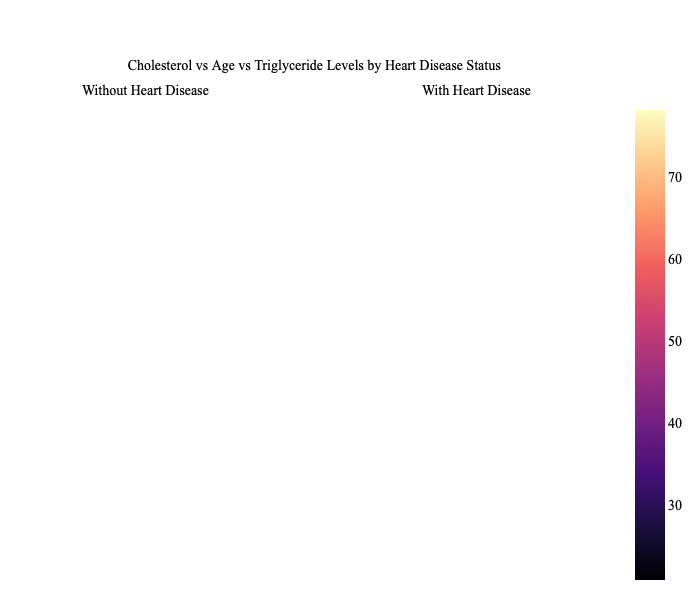

<Figure size 640x480 with 0 Axes>

In [92]:
# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{'type': 'surface'}, {'type': 'surface'}]],
                    subplot_titles=("Without Heart Disease", "With Heart Disease"))

# First plot - Without Heart Disease
heart_disease_df = df[df['Heart Disease Status'] == 'No']
subset = heart_disease_df[['Age', 'Cholesterol Level', 'Triglyceride Level']].dropna()

Z = subset['Age']
Y = subset['Cholesterol Level']
X = subset['Triglyceride Level']

x_line = np.linspace(X.min(), X.max(), 20)
y_line = np.linspace(Y.min(), Y.max(), 20)
x_line, y_line = np.meshgrid(x_line, y_line)
z_line = griddata((X,Y), Z, (x_line, y_line), method='linear')

fig.add_trace(go.Surface(z=z_line, x=x_line, y=y_line, colorscale='Magma',
                         showscale=False), row=1, col=1)

# Second plot - With Heart Disease
heart_disease_df = df[df['Heart Disease Status'] == 'Yes']
subset = heart_disease_df[['Age', 'Cholesterol Level', 'Triglyceride Level']].dropna()

Z = subset['Age']
Y = subset['Cholesterol Level']
X = subset['Triglyceride Level']

x_line = np.linspace(X.min(), X.max(), 20)
y_line = np.linspace(Y.min(), Y.max(), 20)
x_line, y_line = np.meshgrid(x_line, y_line)
z_line = griddata((X,Y), Z, (x_line, y_line), method='linear')

fig.add_trace(go.Surface(z=z_line, x=x_line, y=y_line, colorscale='Magma',
                         showscale=True), row=1, col=2)

# Define consistent font style
font_style = dict(
    family="Times New Roman",
    size=14,
    color="black"
)

# Update layout with consistent styling
fig.update_layout(
    title={
        'text': 'Cholesterol vs Age vs Triglyceride Levels by Heart Disease Status',
        'y':0.90,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': font_style
    },
    font=font_style,
    scene=dict(
        xaxis_title='Triglyceride Level',
        yaxis_title='Cholesterol Level',
        zaxis_title='Age',
        xaxis_title_font=font_style,
        yaxis_title_font=font_style,
        zaxis_title_font=font_style,
    ),
    scene2=dict(
        xaxis_title='Triglyceride Level',
        yaxis_title='Cholesterol Level',
        zaxis_title='Age',
        xaxis_title_font=font_style,
        yaxis_title_font=font_style,
        zaxis_title_font=font_style,
    ),
    width=1200, 
    height=600,
    margin=dict(r=20, l=10, b=10, t=100),  
)

# Update subplot titles
fig.update_annotations(font=font_style)
plt.savefig('CholesterolAgeTriglyceride_byHeartDisease.png')
fig.show()

## Detailed Explanation
Just as cholesterol levels can lead to heart disease, Triglyceride levels also impact heart disease. of course, managing it is important for those who already have heart diseases. 

the following 3D surface plots provide an interactive view between two categorical attributes, and one ordinal attribute (triglyceride levels x-axis, cholesterol levels y-axis, age z-axis) one being for those who already have a heart disease and another for those who don't.

The purpose of this graph is to get an is to once again, get an insight into how different age groups manage their cholesterol and triglyceride levels, and to get an insight into how having heart changes the way people go about their diet.